# 朴素贝叶斯分类

## 1 Iris 数据集

Iris 数据集由著名的统计学家和生物学家 Ronald A. Fisher 在 1936 年首次引入，通常用于模式识别和分类算法的测试。

Iris 数据集包含 150 个样本，描述了三种不同类型的鸢尾花（Iris）：

1. Iris Setosa
2. Iris Versicolor
3. Iris Virginica

数据集包含四个特征（属性），每个特征都是浮点数，代表花瓣和萼片的物理特征：

1. 萼片长度 (sepal length): 单位为厘米
2. 萼片宽度 (sepal width): 单位为厘米
3. 花瓣长度 (petal length): 单位为厘米
4. 花瓣宽度 (petal width): 单位为厘米

---

## 2 分析数据集

### 2.1 读取数据集

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
df.groupby('target').count()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,50,50,50,50
1,50,50,50,50
2,50,50,50,50


### 2.2 可视化

- 使用直方图查看每个特征的分布情况

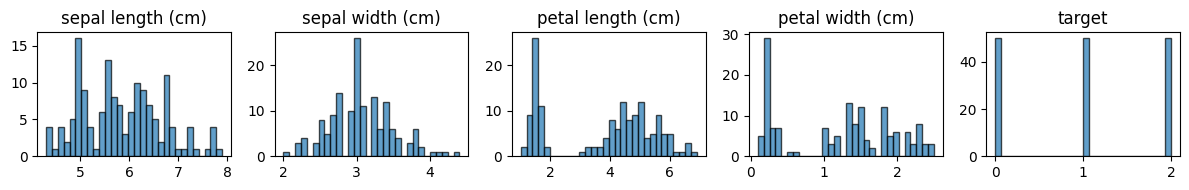

In [5]:
plt.figure(figsize=(12, 2))
for i, col in enumerate(df.columns, 1):
    plt.subplot(1, 5, i)
    plt.hist(df[col], bins=30, alpha=0.7, edgecolor='black')
    plt.title(col)
plt.tight_layout()

- 使用热力图查看各特征之间的相关性

Text(0.5, 1.0, 'Correlation Heatmap')

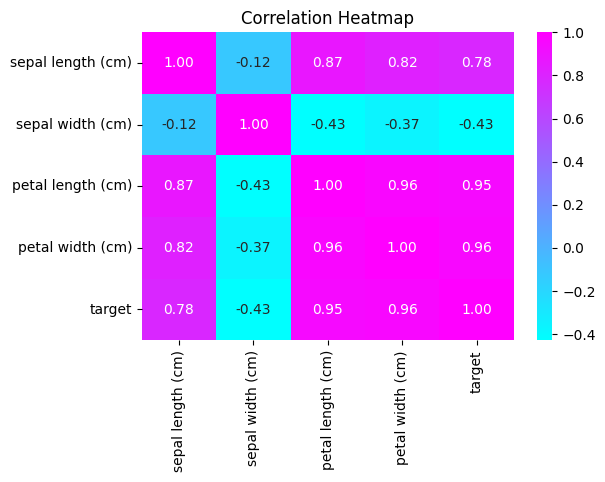

In [6]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='cool')
plt.title('Correlation Heatmap')

---

## 3 构建分类模型

### 3.1 朴素贝叶斯分类

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(120, 30, 120, 30)

In [15]:
model = GaussianNB()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'模型准确率: {accuracy_score(y_pred, y_test)}')

模型准确率: 1.0


### 3.2 逻辑回归模型

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'模型准确率: {accuracy_score(y_pred, y_test)}')

模型准确率: 1.0


---

## 4 Breast Cancer Wisconsin 数据集



In [17]:
breast_cancer = datasets.load_breast_cancer()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(455, 114, 455, 114)

In [19]:
model = GaussianNB()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'模型准确率: {accuracy_score(y_pred, y_test)}')

模型准确率: 0.9736842105263158


In [20]:
model = LogisticRegression()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'模型准确率: {accuracy_score(y_pred, y_test)}')

模型准确率: 0.956140350877193


f:\anaconda\anaconda3\envs\DeltaZero\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
